# Домашнее задание №4

## Задача №0 (3)
Дорешайте задачу про риды и BWT из файла practice4.ipynb. В ответе помимо кода укажите количество ридов первой, второй и третьей категории, а также вкратце опишите ход решения.


Это домашнее задание можно выполнять целиком в этом ноутбуке, либо алгоритмы написать в отдельном файле и импортировать сюда, для использования. В папке data лежат два файла islands.fasta и nonIslands.fasta. В них хранятся прочтения из CpG островков и из обычных участков генома соответственно, этими данными нужно будет воспользоваться в первом задании.

## Задача №1 (1)
Определите частоты генерации для каждого из нуклеотидов внутри CpG островков и вне их. Посчитайте так-же частоты для всех упорядоченных пар нуклеотидов и сравните частоту пары CG внутри островков и снаружи. Сделайте вывод. 

In [1]:
from Bio import SeqIO

def read_fasta(filename):
    return [str(record.seq).upper() for record in SeqIO.parse(filename, "fasta")]

islands = read_fasta("data/islands.fasta")
non_islands = read_fasta("data/nonIslands.fasta")

print(non_islands[:1])

['CTGGATCTCCCTAGGGACACCTCGGTAGGGGCGGCACTGAAAGGCTAGAAGAGCTAGGCAGAGATAACATCCCTGGGTAACTCAAAAGCCAGCTTAAGTATGACCTTGGCCAGATCCCAGAACACCCGCCAGAAAAGTCTCCGCGCTGCCCTATCCAGGTGCTATTGAAGCTCCCTGGGGAGGGAGGAACCCAGCAAGCGACTCAGCATGCAACCAGCAGTACTTCACTCTAAGCGACAAAGGTGATTCCACCCCTGGCCCTTGCGCGCGTGCTCCCGCCTTTACCTTGACTGTTAGCGGCCATTTCGGGGGCGCGGGGGGGGGGGGGACCCTAGTATCGCGATGACACAGCTTCAGACCACGAGACCAGGAACAGGCGTTAGTCATCCGCAGCTGGCTTCCGGCAGGGGGTGGGGGGGCAGATATTTCCAGTCCCTTGGCAGTCGGAGACAGCGGGGCCTGGTCCCATTAGACATCTTTCCTGTCCTGGAGCAGCTGCTACAACCACCTCAGCTGCAGCCCCACACTTGCGCAGAGGAATGAATGCTTGCTACGTGTGCAGAAAGCTTCTCTGCCTTGGTGGTGACAGAGTTTATCTCACCTTTATTTTTTTTAATTTATTTTAGATTTTGCATATTTATGTAAACAATGAACTTATGTTAATTCTGACATTAATTTCAAGGCTGTTTAAGTTCAGGAAAACACATCTTACACTTTTTAAAAGCATTCCAACCACTTAATAATGTACACTTGTATTATGACTGCTGCTTCTTCCGCTTTAAAGTTTTTTTTTTAACTTTGTGTATATGAGTATTTGCATGTGTTTGAGTACAGCACGTGTACGCAGTACCTGAGGCCAAACAGGACTTCCGATCCCTTGGGACTGGAGAGGGGAGTGATACAAATATCTCAATTAGAATTGAGCACTTTATTGCCTCTTATCCTCTGTACATATACTAGTTGTGAGTCTATTAGAAAAAAGAAGATTCTTAGATGAG

In [2]:
from collections import Counter

def freq_nuc(seqs):
    result = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    n = len(seqs)
    for seq in seqs:
        counts = Counter(seq)
        total = len(seq)
        for k in result:
            result[k] += counts.get(k, 0) / total
    result = {k: v / n for k, v in result.items()}
    return result
f_islands = freq_nuc(islands)
f_non_islands = freq_nuc(non_islands)

print("Частоты генерации нуклеотидов внутри островков:", f_islands)
print("Частоты генерации нуклеотидов внутри вне островков:", f_non_islands)

Частоты генерации нуклеотидов внутри островков: {'A': 0.2024622538293213, 'C': 0.29639660831509823, 'G': 0.2982768052516406, 'T': 0.2028643326039384}
Частоты генерации нуклеотидов внутри вне островков: {'A': 0.28929861153616176, 'C': 0.19613640750872205, 'G': 0.1984481597792771, 'T': 0.3161168211758391}


In [3]:

def freq_di(seq):
    total = 0
    counts = {}
    for seq in seq:
        for i in range(len(seq) - 1):
            di = seq[i:i+2]
            if di not in counts:
                counts[di] = 0
            counts[di] += 1
            total += 1
    return {k: v / total for k, v in counts.items()}

d_islands = freq_di(islands)
d_non_islands = freq_di(non_islands)
print('d_islands', '----------', 'd_non_islands')
for k, v in sorted(d_islands.items()):
    print(k, v, '----------', d_non_islands[k])

# for k, v in sorted(d_non_islands.items()):
#     print(k, v)
# print(d_islands)
# print(d_non_islands)
cg_islands = d_islands.get("CG", 0)
cg_non_islands = d_non_islands.get("CG", 0)

print("Частота CG внутри островков:", cg_islands)
print("Частота CG вне островков:", cg_non_islands)
print()
print("Вывод:")
print(f"Пара CG встречается гораздо чаще внутри островков ({cg_islands:.4f}), чем вне островков ({cg_non_islands:.4f})")

d_islands ---------- d_non_islands
AA 0.05121187508415039 ---------- 0.08987626652604618
AC 0.045892749438176415 ---------- 0.04712983539869675
AG 0.07192436480822469 ---------- 0.07019096764473239
AT 0.033417693529478085 ---------- 0.08209819578891861
CA 0.06289331755593333 ---------- 0.06818524238201062
CC 0.10279319090617518 ---------- 0.05001600813589966
CG 0.058983813569804595 ---------- 0.0052779765716222836
CT 0.07174894887268579 ---------- 0.07265810388338544
GA 0.05987457623779067 ---------- 0.06023296546009266
GC 0.08820028176013608 ---------- 0.03422916117367886
GG 0.10355861738308979 ---------- 0.05011488191645636
GT 0.046658723234702694 ---------- 0.05387208557761121
TA 0.028453778311475213 ---------- 0.07100549926550906
TC 0.059529491222635386 ---------- 0.06475761798937812
TG 0.06383197068994016 ---------- 0.07286526799502806
TT 0.05102660739560152 ---------- 0.10748992429093375
Частота CG внутри островков: 0.058983813569804595
Частота CG вне островков: 0.005277976571622

## Задача №2 (2)
Напишите марковскую модель, которая имеет открытые состояния {A, T, G, C}, и скрытые состояния {+, -}. Когда модель в состоянии **+**, то вероятность генерации некоторого символа нуклеотида соответствует его частоте внутри CpG островков, вычислиному в первом задании, если состояние **-**, то частоте вне островков. Вероятность остаться внутри островка 0.95, а перейти в обычный геном 0.05. Для остальной части генома соответствующие вероятности 0.995 и 0.005. Саму модель можно реализовать в виде итератора, определив метод next, который возвращает пару - состояние и нуклеотид, который в этом состоянии произведен.    
Воспользуйтесь данной моделью для того чтобы сгенерировать набор из 20 последовательностей длинной от 1 000 до 100 000, причем к каждой последовательности должна прилагаться последовательность состояний.

In [4]:
import random
random.seed(42)
class Mar_Model:
    def __init__(self):
        # Веротяности из 1 задания
        plus_p_s = 0.95
        minus_p_s = 0.995
        plus_p = {'A': 0.2024622538293213, 'C': 0.29639660831509823, 'G': 0.2982768052516406, 'T': 0.2028643326039384}
        minus_p= {'A': 0.28929861153616176, 'C': 0.19613640750872205, 'G': 0.1984481597792771, 'T': 0.3161168211758391}
        self.emission = {'+': plus_p, '-': minus_p}
        self.trans = {
            '+': {'+': plus_p_s, '-': 1 - plus_p_s},
            '-': {'-': minus_p_s, '+': 1 - minus_p_s}}
        self.all_state_probs = {'+' : 0.1, '-': 0.9}
        self.state = random.choices(list(self.all_state_probs.keys()) , list(self.all_state_probs.values()))[0]
        
    def __iter__(self):
        return self

    def __next__(self):
        state = self.state
        if  state == "-":
            p = self.emission["-"]
        else:
            p = self.emission["+"]
        nuc = random.choices(list(p.keys()), list(p.values()))[0]
        probs = self.trans[state]
        next_state = random.choices(list(probs.keys()), list(probs.values()))[0]
        self.state = next_state
        return state, nuc
    

In [5]:
# Генерация последовательностей
random.seed(42)

model = Mar_Model()
seqs = []
states_seq = []
for _ in range(20):
    length = random.randint(1000, 100000)
    seq = []
    st = []
    it = iter(model)
    for _ in range(length):
        state, nuc = next(it)
        seq.append(nuc)
        st.append(state)
    seqs.append(''.join(seq))
    states_seq.append(''.join(st))
for i, (s, p) in enumerate(zip(seqs, states_seq), 1):
    print(f">seq_{i} length={len(s)}")
    print(s[:50] + '...')
    print(f">States_{i}")
    print(p[:50] + '...')


>seq_1 length=4278
TATGAGTCATCAACACTCTAGTTCAGGGAATCATAGATATTGTGTAGGAT...
>States_1
--------------------------------------------------...
>seq_2 length=11828
TAATAATGTGATCACGCGCACAAATACAGCCGGCAATATGTAAGTTTTAT...
>States_2
--------------------------------------------------...
>seq_3 length=18453
ATGGTCCAGGCTCTCGCGGTGCCGTGGGAGCAATGAGCCCAAAACACTGA...
>States_3
-----++++++++++++++++++++++++---------------------...
>seq_4 length=47066
TCCTGTGTTTATGAAATTCATTAATAGTGACTTTATCTTTATGTAGTATA...
>States_4
--------------------------------------------------...
>seq_5 length=82001
TGATAGCCAATTTTCCGGTAATGTTAGTGATAGCTAAGGCTGTATCAGCA...
>States_5
--------------------------------------------------...
>seq_6 length=37357
TTTCTTGAGGTCGTAGACAACAAAGATGCTTTAAGGGGGTCTGACGTTAA...
>States_6
+-------------------------------------------------...
>seq_7 length=19219
CTCGCAGCACGTTGGGCATGGCTATGTATGATGTACGTGATTATTAAAAA...
>States_7
--------------------------------------------------...
>seq_8 length=13996
CAGTGTGACGGTCTA

## Задача №3 (4)
Напишите алгоритм Витерби для восстановления последовательности скрытых состояний марковской модели из второго задаания. Воспользуйтесь им, воссстановив состояния тех последовательностей, которые вы получили во втором задании и посчитайте TP, TN, FP, FN по количеству правильно или ошибочно предсказанных позиций из CpG остравков. 

In [6]:

import numpy as np
# решила через логарифмы, чтобы избежать проблем с точностью
def viterbi(seq, model):
    states = sorted(model.all_state_probs.keys())
    log_start = {s: np.log(p) for s, p in model.all_state_probs.items()}
    log_trans = {k: {l: np.log(p) for l, p in v.items()} for k, v in model.trans.items()}
    log_emit = {s: {obs: np.log(p) for obs, p in v.items()} for s, v in model.emission.items()}

    K = len(states)
    L = len(seq)
    v = [[0.0 for _ in range(L)] for _ in range(K)]
    ptr = [[0 for _ in range(L)] for _ in range(K)]

    idx = {s: i for i, s in enumerate(states)}
    # print(idx)
    x0 = seq[0]
    for s in states:
        k = idx[s]
        v[k][0] = log_start[s] + log_emit[s][x0]
        ptr[k][0] = 0

    for i in range(1, L):
        xi = seq[i]
        for l in states:
            l_idx = idx[l]
            scores = []
            for k in states:
                k_idx = idx[k]
                score = v[k_idx][i - 1] + log_trans[k][l]
                scores.append((score, k_idx))
            max_score, best_k = max(scores, key=lambda x: x[0])
            v[l_idx][i] = max_score + log_emit[l][xi]
            ptr[l_idx][i] = best_k
        # print(v)
        # print(ptr)
    last_probs = [v[k][L - 1] for k in range(K)]
    last_idx = np.argmax(last_probs)
    path = [last_idx]
    # print(ptr)
    # print(v)
    # print(path)
    for i in range(L - 1, 0, -1):
        prev_idx = ptr[path[-1]][i]
        path.append(prev_idx)
    path.reverse()
    result = [states[k] for k in path]
    # print(result)
    return result

def f(true_seq, pred_seq, pos_='+'):
    res = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    for t, p in zip(true_seq, pred_seq):
        if t == pos_ and p == pos_:
            res['TP'] += 1
        elif t != pos_ and p != pos_:
            res['TN'] += 1
        elif t != pos_ and p == pos_:
            res['FP'] += 1
        else:
            res['FN'] += 1
    return res

In [7]:
import numpy as np

# запуск
model = Mar_Model()
list_metrics = []
for seq, true_st in zip(seqs, states_seq):
    obs = list(seq)
    pred_st = viterbi(obs, model)
    metrics = f(true_st, pred_st, pos_='+')
    metrics["Длина"] = len(obs)
    print(metrics)
    list_metrics.append(metrics)
    # break

mean_metrics = np.mean([i["TP"]/i["Длина"] for i in list_metrics])
print(mean_metrics)

{'TP': 0, 'TN': 3853, 'FP': 0, 'FN': 425, 'Длина': 4278}
{'TP': 157, 'TN': 10646, 'FP': 42, 'FN': 983, 'Длина': 11828}
{'TP': 88, 'TN': 16835, 'FP': 9, 'FN': 1521, 'Длина': 18453}
{'TP': 267, 'TN': 43047, 'FP': 30, 'FN': 3722, 'Длина': 47066}
{'TP': 384, 'TN': 74821, 'FP': 93, 'FN': 6703, 'Длина': 82001}
{'TP': 57, 'TN': 33892, 'FP': 1, 'FN': 3407, 'Длина': 37357}
{'TP': 77, 'TN': 17486, 'FP': 40, 'FN': 1616, 'Длина': 19219}
{'TP': 134, 'TN': 12848, 'FP': 47, 'FN': 967, 'Длина': 13996}
{'TP': 426, 'TN': 48782, 'FP': 102, 'FN': 5356, 'Длина': 54666}
{'TP': 546, 'TN': 83045, 'FP': 94, 'FN': 7412, 'Длина': 91097}
{'TP': 142, 'TN': 9671, 'FP': 51, 'FN': 647, 'Длина': 10511}
{'TP': 73, 'TN': 4168, 'FP': 6, 'FN': 326, 'Длина': 4573}
{'TP': 265, 'TN': 40961, 'FP': 59, 'FN': 3430, 'Длина': 44715}
{'TP': 70, 'TN': 10402, 'FP': 3, 'FN': 809, 'Длина': 11284}
{'TP': 0, 'TN': 11965, 'FP': 0, 'FN': 1265, 'Длина': 13230}
{'TP': 135, 'TN': 39730, 'FP': 47, 'FN': 3892, 'Длина': 43804}
{'TP': 49, 'TN': 

## Задача №4 (4)
Напишите алгоритм вперед назад для модели из второго задания. Пользуясь этим алгоритмом найдите вероятности того, что модель находилась в состоянии **+** для каждой позиции строк из второго задания. Устанавливая различные пороговые значения, определите позиции соответствующие CpG островкам и посчитайте TP. Постройте график зависимости TP от выбранного порогового значения. Есть ли пороговые значения при которых TP больше чем в задании №3?

In [ ]:
# # Данный вариант не работал, выдавал 0, подумала, что дело в точности, переписала через логарифмы, код ниже


# def forward(seq, model):
#     states = sorted(model.all_state_probs.keys())
#     idx = {s: i for i, s in enumerate(states)}
#     L = len(seq)
#     alpha = np.zeros((L, len(states)))
#     for s in states:
#         alpha[0, idx[s]] = model.all_state_probs[s] * model.emission[s][seq[0]]
#     for t in range(1, L):
#         x = seq[t]
#         for s in states:
#             total = 0.0
#             for prev in states:
#                 total += alpha[t-1, idx[prev]] * model.trans[prev][s]

#             alpha[t, idx[s]] += total * model.emission[s][x]
#     return alpha


# def backward(seq, model):
#     states = sorted(model.all_state_probs.keys())
#     idx = {s: i for i, s in enumerate(states)}
#     L = len(seq)
#     beta = np.zeros((L, len(states)))
#     for s in states:
#         beta[L-1, idx[s]] = 1.0
#     for t in range(L-2, -1, -1):
#         x_next = seq[t+1]
#         for s in states:
#             total = 0.0
#             for ns in states:
#                 total += model.trans[s][ns] * model.emission[ns][x_next] * beta[t+1, idx[ns]]
#             beta[t, idx[s]] = total
#     return beta


# def posterior_plus(seq, model, state_name = '+'):
#     states = sorted(model.all_state_probs.keys())
#     idx = {s: i for i, s in enumerate(states)}
    
#     alpha = forward(seq, model)
#     beta = backward(seq, model)
#     print(alpha)
#     gamma = alpha * beta
#     norm = gamma.sum(axis=1, keepdims=True)
    
#     posterior = gamma / norm
#     print(posterior[:, idx[state_name]])
#     return posterior[:, idx[state_name]]

In [ ]:
import numpy as np

def log_forward(seq, model):
    states = sorted(model.all_state_probs.keys())
    idx = {s: i for i, s in enumerate(states)}
    L = len(seq)
    log_alpha = np.full((L, len(states)), -np.inf)
    
    for s in states:
        log_alpha[0, idx[s]] = np.log(model.all_state_probs[s]) + np.log(model.emission[s][seq[0]])

    for t in range(1, L):
        x = seq[t]
        for s in states:
            log_total = -np.inf
            for prev in states:
                transition = np.log(model.trans[prev][s])
                log_sum = log_alpha[t-1, idx[prev]] + transition
                log_total = np.logaddexp(log_total, log_sum)

            emission = np.log(model.emission[s][x])
            log_alpha[t, idx[s]] = log_total + emission
    
    return log_alpha

def log_backward(seq, model):
    states = sorted(model.all_state_probs.keys())
    idx = {s: i for i, s in enumerate(states)}
    L = len(seq)
    log_beta = np.full((L, len(states)), -np.inf) 
    
    for s in states:
        log_beta[L-1, idx[s]] = 0.0  
    
    for t in range(L-2, -1, -1):
        x_next = seq[t+1]
        for s in states:
            log_total = -np.inf
            for ns in states:
                transition = np.log(model.trans[s][ns]) 
                emission = np.log(model.emission[ns][x_next])
                log_sum = transition + emission + log_beta[t+1, idx[ns]]
                log_total = np.logaddexp(log_total, log_sum)
            
            log_beta[t, idx[s]] = log_total
    
    return log_beta

def log_posterior_plus(seq, model, state_name='+'):
    states = sorted(model.all_state_probs.keys())
    idx = {s: i for i, s in enumerate(states)}
    
    log_alpha = log_forward(seq, model)
    log_beta = log_backward(seq, model)

    log_gamma = log_alpha + log_beta

    log_norm = np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)
    log_posterior = log_gamma - log_norm
    
    posterior = np.exp(log_posterior)
    # print(posterior[:, idx[state_name]])
    return posterior[:, idx[state_name]]

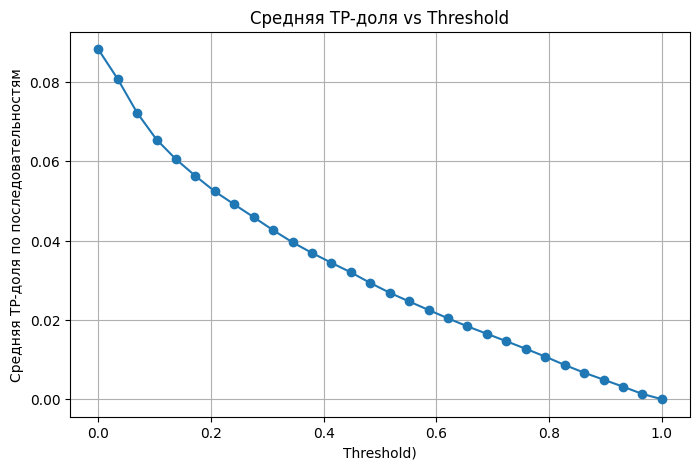

Максимальная средняя TP-доля из forward-backward при пороге 0.0: 0.08828
Средняя TP-доля из 3 задания: 0.00587


In [10]:
import numpy as np
import matplotlib.pyplot as plt
# посчитала среднюю долю, решила, что так нагляднее, по всем 20 последовательностям.

thresholds = np.linspace(0, 1, 30)
tp_means = []

for thr in thresholds:
    tp_per_seq = []

    for seq, true_states in zip(seqs, states_seq):
        post = log_posterior_plus(seq, model, state_name='+')
        preds = post > thr
        trues = np.array([s == '+' for s in true_states])
        
        tp = np.sum(preds & trues)
        seq_len = len(seq)
        tp_rate = tp / seq_len if seq_len > 0 else 0
        tp_per_seq.append(tp_rate)

    tp_mean = np.mean(tp_per_seq)
    tp_means.append(tp_mean)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, tp_means, marker='o')
plt.xlabel('Threshold)')
plt.ylabel('Средняя TP-доля по последовательностям')
plt.title('Средняя TP-доля vs Threshold')
plt.grid(True)
plt.show()

# Сравнение с заданием 3

best_tp_mean = max(tp_means)
print(f"Максимальная средняя TP-доля из forward-backward при пороге {thresholds[np.argmax(tp_means)]}: {best_tp_mean:.5f}")
# средняя доля для 3 задания
print(f"Средняя TP-доля из 3 задания: {mean_metrics:.5f}")



Вывод:

Максимальная средняя TP-доля из forward-backward при пороге 0.0 (0.08828) показывает, что при этом пороге модель активно предсказывает "+" для большинства позиций, что увеличивает TP, но также может увеличивать FP.

Средняя TP-доля из задания 3 (0.00587) более консервативна, так как модель использует только наиболее вероятные пути и предсказывает "+" в меньшем числе случаев.